In [ ]:
import pandas as pd

# Load your dataset from a CSV file (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('FB_auto_testing.csv')

# Drop rows after row 32495 (inclusive)
data.drop(range(32496, len(data)), inplace=True)

# Display the first few rows of the dataset to get an overview
print(data.head())

# Check for missing values and handle them if necessary
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# If there are missing values, you can choose to drop or fill them
# For example, you can fill missing numerical values with the mean
data.fillna(data.mean(), inplace=True)



# Separate the target variable (e.g., 'Target Lambda') from the predictors
X = data.drop(columns=['Target Lambda'])
y = data['Target Lambda']

# Now, you have X (predictor variables) and y (target variable) ready for model training

  Time (sec)  RPM Air Temp (C) Coolant Temp (C) TPS (%) MAP (kPa)  \
0          0  329           45               89       1    101.77   
1       0.02  329           45               89     1.1    102.46   
2       0.04  329           45               89     1.6    103.01   
3       0.06  329           45               89     2.1    103.56   
4       0.08  329           45               89     2.4    112.11   

  Fuel Open Time (ms) Accel Compensation - Fuel (%)  \
0                4.91                           100   
1                4.91                           100   
2                4.91                           100   
3                4.91                           100   
4                4.91                           100   

  Starting Compensation - Fuel (%)  Coolant Temp Compensation - Fuel (%)  \
0                            110.6                                 108.1   
1                            110.6                                 108.1   
2                         

<ipython-input-1-cedf39079c4c>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


<ipython-input-4-33306a144b3f>:12: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = X.corrwith(y)


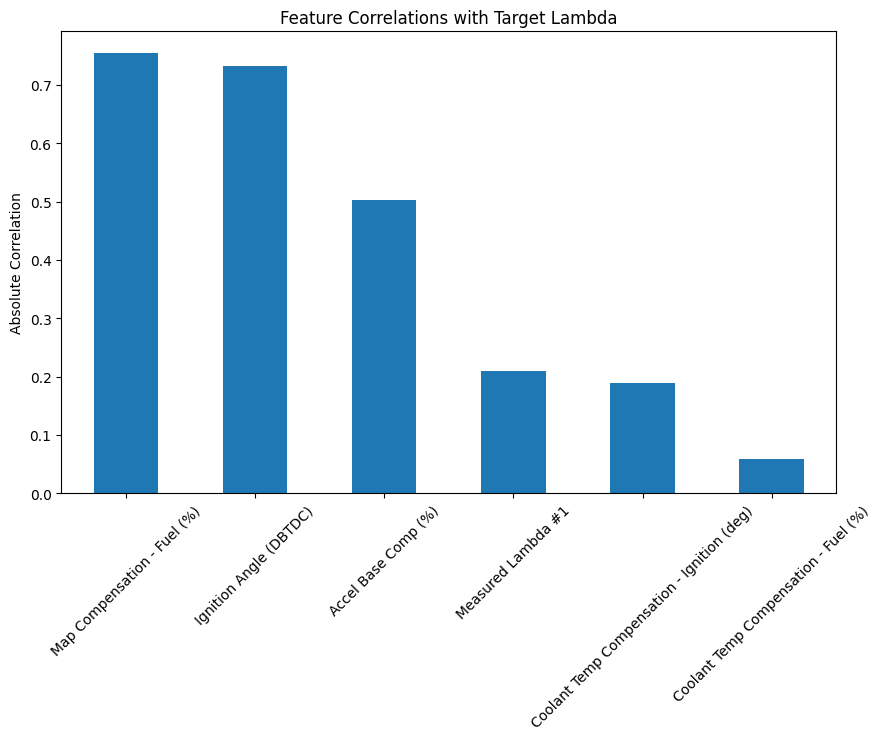

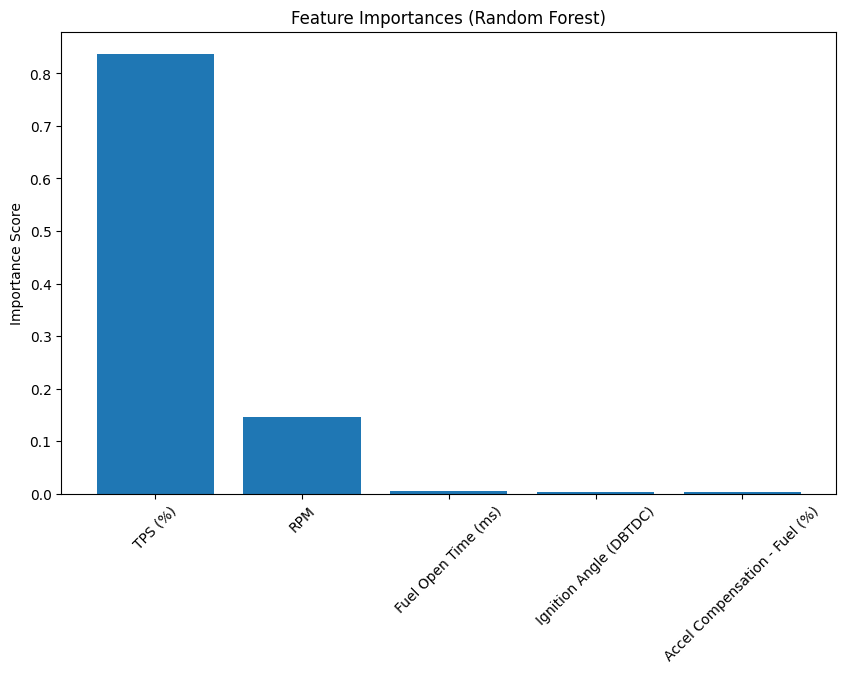

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your preprocessed dataset (X and y) from the previous step
# For demonstration purposes, we'll use a synthetic dataset here
# Replace this with your actual dataset
# X, y = ...

# Calculate feature correlations with the target variable ("Target Lambda")
correlations = X.corrwith(y)

# Sort features by their absolute correlation with the target
correlations = correlations.abs().sort_values(ascending=False)

# Plot feature correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Feature Correlations with Target Lambda')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.show()

# Select the top N features based on correlation (you can choose an appropriate threshold)
top_n_features = 5
selected_features_corr = correlations.index[:top_n_features]

# Perform feature selection using a tree-based model (Random Forest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Sort features by their importance score
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(top_n_features), feature_importances[indices][:top_n_features])
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance Score')
plt.xticks(range(top_n_features), X.columns[indices][:top_n_features], rotation=45)
plt.show()

# Select the top N features based on feature importance
selected_features_rf = X.columns[indices][:top_n_features]

# Combine both methods or choose one based on your preference
selected_features = set(selected_features_corr) | set(selected_features_rf)

# Now, 'selected_features' contains the features you've chosen for your model
# You can use these features to train your machine learning model


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
# Adjust the test_size parameter to control the proportion of data in the test set
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Test set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (25996, 9) y: (25996,)
Test set - X: (6500, 9) y: (6500,)


<ipython-input-9-2095902d2b0e>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader



# Assuming you have already selected your features and target variable
# selected_features = ['feature1', 'feature2', 'feature3']  # Adjust with your selected features
target_variable = 'Target Lambda'  # Adjust with your target variable

# Split the data into features (X) and target variable (y)
X = data[selected_features]
y = data[target_variable]



<ipython-input-13-a00afa81f056>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = data[selected_features]


In [ ]:

# Split the data into features (X) and target variable (y)
X = data[selected_features].astype('float64')  # Convert X to float64
y = data[target_variable].astype('float64')    # Convert y to float


<ipython-input-14-139d3af3194f>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = data[selected_features].astype('float64')  # Convert X to float64


Epoch [1/100], Loss: 771.1680
Epoch [2/100], Loss: 0.7671
Epoch [3/100], Loss: 0.1056
Epoch [4/100], Loss: 0.0114
Epoch [5/100], Loss: 0.0089
Epoch [6/100], Loss: 0.0093
Epoch [7/100], Loss: 0.0106
Epoch [8/100], Loss: 0.0083
Epoch [9/100], Loss: 0.0108
Epoch [10/100], Loss: 0.0207
Epoch [11/100], Loss: 0.2404
Epoch [12/100], Loss: 2.5637
Epoch [13/100], Loss: 3.4576
Epoch [14/100], Loss: 1.2383
Epoch [15/100], Loss: 4.5337
Epoch [16/100], Loss: 1.2143
Epoch [17/100], Loss: 1.4240
Epoch [18/100], Loss: 6.7279
Epoch [19/100], Loss: 0.0225
Epoch [20/100], Loss: 2.0561
Epoch [21/100], Loss: 2.1932
Epoch [22/100], Loss: 0.1406
Epoch [23/100], Loss: 2.1763
Epoch [24/100], Loss: 0.7363
Epoch [25/100], Loss: 3.8061
Epoch [26/100], Loss: 0.0717
Epoch [27/100], Loss: 0.7159
Epoch [28/100], Loss: 1.5069
Epoch [29/100], Loss: 3.5247
Epoch [30/100], Loss: 0.0100
Epoch [31/100], Loss: 0.2582
Epoch [32/100], Loss: 0.9967
Epoch [33/100], Loss: 0.3981
Epoch [34/100], Loss: 1.2334
Epoch [35/100], Loss:

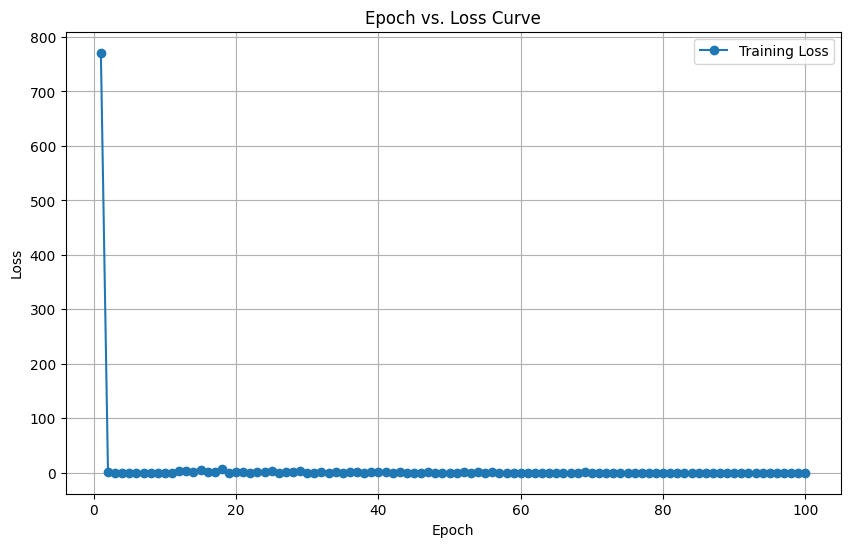

In [ ]:
import matplotlib.pyplot as plt

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Split the dataset into training and test sets
train_size = int(0.8 * len(X))
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create instances of CustomDataset
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Create DataLoader objects for batching
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_size = len(selected_features)
model = RegressionModel(input_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize an empty list to collect the training losses
train_losses = []

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0  # Initialize the loss for this epoch
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        epoch_loss += loss.item()  # Add the batch loss to the epoch loss

    # Calculate and store the average training loss for this epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)  # Append the loss to the list

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Plot the epoch vs. loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss Curve')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
# Making predictions on new data
# Load and preprocess the new data
new_data = pd.read_csv('autocross_supra_2022.csv')  # Replace 'new_data.csv' with your file path
new_data = new_data[selected_features]
new_data_tensor = torch.tensor(new_data.values, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(new_data_tensor)

# Convert the predictions to a NumPy array
predicted_values = predictions.numpy()

print(predicted_values)

[[0.76545274]
 [0.8761874 ]
 [0.8744468 ]
 ...
 [1.0524204 ]
 [1.0524004 ]
 [1.0521457 ]]


<ipython-input-22-aa74b792373d>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_data = new_data[selected_features]


In [ ]:
# Create a DataFrame with a single column named 'Target Lambda'
df = pd.DataFrame(predicted_values, columns=['Target Lambda'])

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)  # Replace 'output.csv' with your desired file name

# Regularization

In [ ]:
class ImprovedRegressionModel(nn.Module):
    def __init__(self, input_size, dropout_prob=0.5):
        super(ImprovedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100], Loss: 554.9605
Epoch [2/100], Loss: 9.8825
Epoch [3/100], Loss: 3.0602
Epoch [4/100], Loss: 1.6862
Epoch [5/100], Loss: 1.2469
Epoch [6/100], Loss: 0.7305
Epoch [7/100], Loss: 0.4253
Epoch [8/100], Loss: 0.4460
Epoch [9/100], Loss: 0.2320
Epoch [10/100], Loss: 0.2321
Epoch [11/100], Loss: 0.2473
Epoch [12/100], Loss: 0.1575
Epoch [13/100], Loss: 0.0494
Epoch [14/100], Loss: 0.0522
Epoch [15/100], Loss: 0.0275
Epoch [16/100], Loss: 0.0353
Epoch [17/100], Loss: 0.0305
Epoch [18/100], Loss: 0.0878
Epoch [19/100], Loss: 0.0262
Epoch [20/100], Loss: 0.0461
Epoch [21/100], Loss: 0.0041
Epoch [22/100], Loss: 0.0016
Epoch [23/100], Loss: 0.0019
Epoch [24/100], Loss: 0.0095
Epoch [25/100], Loss: 0.0016
Epoch [26/100], Loss: 0.0206
Epoch [27/100], Loss: 0.0063
Epoch [28/100], Loss: 0.0132
Epoch [29/100], Loss: 0.0188
Epoch [30/100], Loss: 0.0044
Epoch [31/100], Loss: 0.0037
Epoch [32/100], Loss: 0.0008
Epoch [33/100], Loss: 0.0031
Epoch [34/100], Loss: 0.0021
Epoch [35/100], Loss:

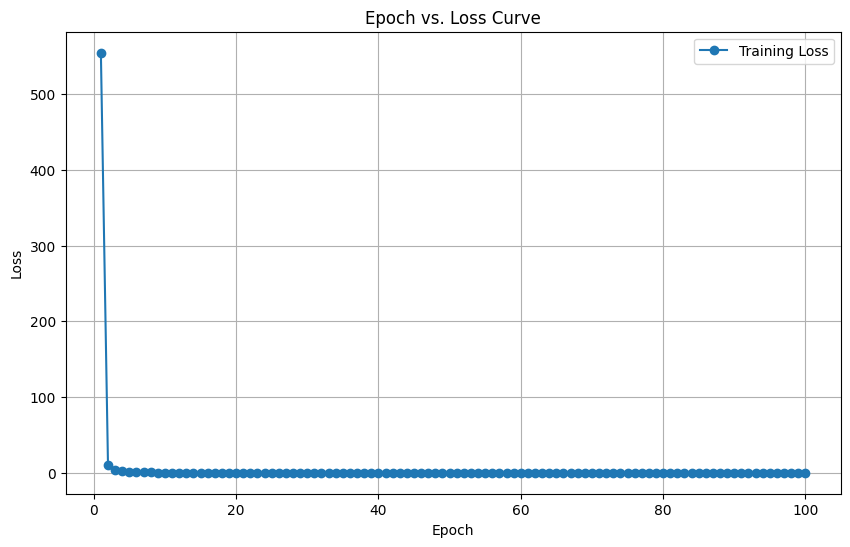

In [ ]:
# Initialize the model
input_size = len(selected_features)
model = ImprovedRegressionModel(input_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize an empty list to collect the training losses
train_losses = []

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0  # Initialize the loss for this epoch
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        epoch_loss += loss.item()  # Add the batch loss to the epoch loss

    # Calculate and store the average training loss for this epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)  # Append the loss to the list

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Plot the epoch vs. loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Making predictions on new data
# Load and preprocess the new data
new_data = pd.read_csv('autocross_supra_2022.csv')  # Replace 'new_data.csv' with your file path
new_data = new_data[selected_features]
new_data_tensor = torch.tensor(new_data.values, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(new_data_tensor)

# Convert the predictions to a NumPy array
predicted_values = predictions.numpy()

print(predicted_values)

[[0.9062567]
 [0.9062567]
 [0.9062567]
 ...
 [0.9062567]
 [0.9062567]
 [0.9062567]]


<ipython-input-31-aa74b792373d>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_data = new_data[selected_features]


In [ ]:
# Create a DataFrame with a single column named 'Target Lambda'
df = pd.DataFrame(predicted_values, columns=['Target Lambda'])

# Save the DataFrame to a CSV file
df.to_csv('output_regularization.csv', index=False)  # Replace 'output.csv' with your desired file name

In [ ]:
class ImprovedRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(ImprovedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)  # Batch Normalization
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)   # Batch Normalization
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)   # Batch Normalization
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)
        x = torch.relu(self.fc3(x))
        x = self.bn3(x)
        x = self.fc4(x)
        return x


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100], Loss: 0.1774
Epoch [2/100], Loss: 0.0013
Epoch [3/100], Loss: 0.0008
Epoch [4/100], Loss: 0.0016
Epoch [5/100], Loss: 0.0021
Epoch [6/100], Loss: 0.0007
Epoch [7/100], Loss: 0.0008
Epoch [8/100], Loss: 0.0007
Epoch [9/100], Loss: 0.0010
Epoch [10/100], Loss: 0.0009
Epoch [11/100], Loss: 0.0007
Epoch [12/100], Loss: 0.0009
Epoch [13/100], Loss: 0.0007
Epoch [14/100], Loss: 0.0007
Epoch [15/100], Loss: 0.0007
Epoch [16/100], Loss: 0.0008
Epoch [17/100], Loss: 0.0007
Epoch [18/100], Loss: 0.0007
Epoch [19/100], Loss: 0.0007
Epoch [20/100], Loss: 0.0008
Epoch [21/100], Loss: 0.0007
Epoch [22/100], Loss: 0.0007
Epoch [23/100], Loss: 0.0007
Epoch [24/100], Loss: 0.0007
Epoch [25/100], Loss: 0.0007
Epoch [26/100], Loss: 0.0007
Epoch [27/100], Loss: 0.0007
Epoch [28/100], Loss: 0.0007
Epoch [29/100], Loss: 0.0007
Epoch [30/100], Loss: 0.0007
Epoch [31/100], Loss: 0.0007
Epoch [32/100], Loss: 0.0007
Epoch [33/100], Loss: 0.0007
Epoch [34/100], Loss: 0.0007
Epoch [35/100], Loss: 0

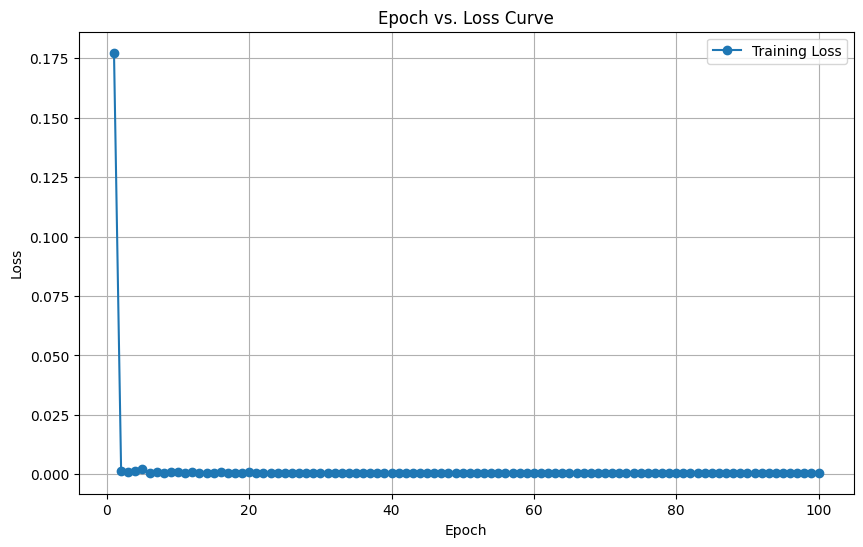

In [ ]:
# Initialize the model
input_size = len(selected_features)
model = ImprovedRegressionModel(input_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize an empty list to collect the training losses
train_losses = []

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0  # Initialize the loss for this epoch
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        epoch_loss += loss.item()  # Add the batch loss to the epoch loss

    # Calculate and store the average training loss for this epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)  # Append the loss to the list

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Plot the epoch vs. loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Making predictions on new data
# Load and preprocess the new data
new_data = pd.read_csv('autocross_supra_2022.csv')  # Replace 'new_data.csv' with your file path
new_data = new_data[selected_features]
new_data_tensor = torch.tensor(new_data.values, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(new_data_tensor)

# Convert the predictions to a NumPy array
predicted_values = predictions.numpy()

print(predicted_values)

[[0.9058681 ]
 [0.68669826]
 [0.6858843 ]
 ...
 [0.8990988 ]
 [0.89912415]
 [0.89912236]]


<ipython-input-35-aa74b792373d>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_data = new_data[selected_features]


In [ ]:
# Create a DataFrame with a single column named 'Target Lambda'
df = pd.DataFrame(predicted_values, columns=['Target Lambda'])

# Save the DataFrame to a CSV file
df.to_csv('output_batch_norm.csv', index=False)  # Replace 'output.csv' with your desired file name

In [ ]:
import torch.nn.functional as F  # Import the functional module for loss functions

# Define a custom loss function based on Mean Absolute Error (MAE)
def mean_absolute_error(output, target):
    return torch.mean(torch.abs(output - target))

# Define the neural network model
class ImprovedRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(ImprovedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

train_losses = []


# Initialize the model
input_size = len(selected_features)
model = ImprovedRegressionModel(input_size)

# Define the loss function as MAE
criterion = mean_absolute_error  # Use MAE as the loss function

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0  # Initialize the loss for this epoch
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        epoch_loss += loss.item()  # Add the batch loss to the epoch loss

    # Calculate and store the average training loss for this epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)  # Append the loss to the list

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')



Epoch [1/100], Loss: 5.1149
Epoch [2/100], Loss: 1.2793
Epoch [3/100], Loss: 0.5113
Epoch [4/100], Loss: 0.2914
Epoch [5/100], Loss: 0.2422
Epoch [6/100], Loss: 0.1609
Epoch [7/100], Loss: 0.1145
Epoch [8/100], Loss: 0.0880
Epoch [9/100], Loss: 0.0673
Epoch [10/100], Loss: 0.0530
Epoch [11/100], Loss: 0.0479
Epoch [12/100], Loss: 0.0400
Epoch [13/100], Loss: 0.0361
Epoch [14/100], Loss: 0.0304
Epoch [15/100], Loss: 0.0284
Epoch [16/100], Loss: 0.0292
Epoch [17/100], Loss: 0.0259
Epoch [18/100], Loss: 0.0269
Epoch [19/100], Loss: 0.0309
Epoch [20/100], Loss: 0.0263
Epoch [21/100], Loss: 0.0535
Epoch [22/100], Loss: 0.0214
Epoch [23/100], Loss: 0.0215
Epoch [24/100], Loss: 0.0215
Epoch [25/100], Loss: 0.0217
Epoch [26/100], Loss: 0.0227
Epoch [27/100], Loss: 0.0318
Epoch [28/100], Loss: 0.0214
Epoch [29/100], Loss: 0.0214
Epoch [30/100], Loss: 0.0215
Epoch [31/100], Loss: 0.0215
Epoch [32/100], Loss: 0.0215
Epoch [33/100], Loss: 0.0214
Epoch [34/100], Loss: 0.0215
Epoch [35/100], Loss: 0

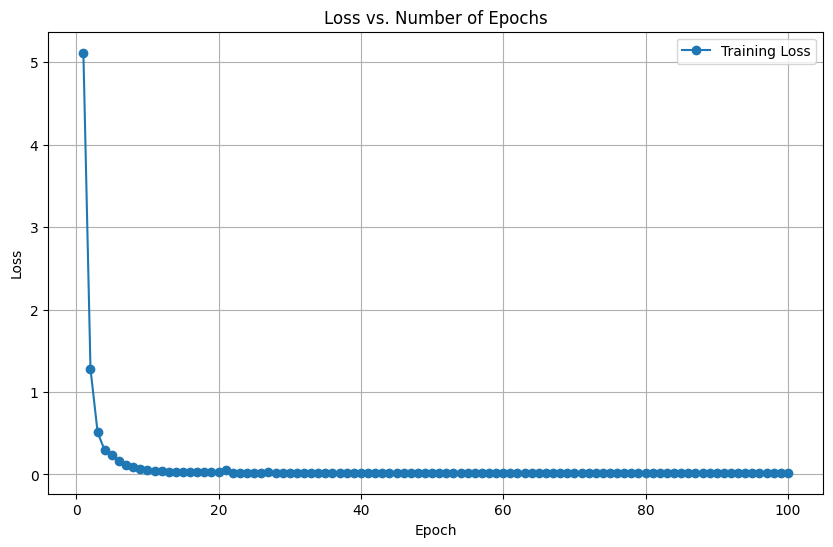

In [ ]:
# Plot the loss vs. number of epochs curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Making predictions on new data
# Load and preprocess the new data
new_data = pd.read_csv('autocross_supra_2022.csv')  # Replace 'new_data.csv' with your file path
new_data = new_data[selected_features]
new_data_tensor = torch.tensor(new_data.values, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(new_data_tensor)

# Convert the predictions to a NumPy array
predicted_values = predictions.numpy()

print(predicted_values)

[[0.9099436]
 [0.9099436]
 [0.9099436]
 ...
 [0.9099436]
 [0.9099436]
 [0.9099436]]


<ipython-input-39-aa74b792373d>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_data = new_data[selected_features]


In [ ]:
# Create a DataFrame with a single column named 'Target Lambda'
df = pd.DataFrame(predicted_values, columns=['Target Lambda'])

# Save the DataFrame to a CSV file
df.to_csv('output_modifiedMSE.csv', index=False)  # Replace 'output.csv' with your desired file name

# Ignition angle prediction

In [ ]:
import pandas as pd

# Load your dataset from a CSV file (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('FB_auto_testing.csv')

# Drop rows after row 32495 (inclusive)
data.drop(range(32496, len(data)), inplace=True)

# Display the first few rows of the dataset to get an overview
print(data.head())

# Check for missing values and handle them if necessary
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# If there are missing values, you can choose to drop or fill them
# For example, you can fill missing numerical values with the mean
data.fillna(data.mean(), inplace=True)



# Separate the target variable (e.g., 'Target Lambda') from the predictors
X = data.drop(columns=['Ignition Angle (DBTDC)'])
y = data['Ignition Angle (DBTDC)']

# Now, you have X (predictor variables) and y (target variable) ready for model training

  Time (sec)  RPM Air Temp (C) Coolant Temp (C) TPS (%) MAP (kPa)  \
0          0  329           45               89       1    101.77   
1       0.02  329           45               89     1.1    102.46   
2       0.04  329           45               89     1.6    103.01   
3       0.06  329           45               89     2.1    103.56   
4       0.08  329           45               89     2.4    112.11   

  Fuel Open Time (ms) Accel Compensation - Fuel (%)  \
0                4.91                           100   
1                4.91                           100   
2                4.91                           100   
3                4.91                           100   
4                4.91                           100   

  Starting Compensation - Fuel (%)  Coolant Temp Compensation - Fuel (%)  \
0                            110.6                                 108.1   
1                            110.6                                 108.1   
2                         

<ipython-input-41-9f6e2c5af592>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


# Linear Regression

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded your data into X and y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
linear_predictions = linear_model.predict(X_test)

# Evaluate the Linear Regression model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Print evaluation results
print("Linear Regression Mean Squared Error:", linear_mse)
print("Linear Regression R-squared:", linear_r2)


Linear Regression Mean Squared Error: 9.280352289237571
Linear Regression R-squared: 0.7714035859429509


# Decision Tree

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree Regression model
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)

# Print evaluation results
print("Decision Tree Mean Squared Error:", decision_tree_mse)
print("Decision Tree R-squared:", decision_tree_r2)


Decision Tree Mean Squared Error: 3.1454030769230767
Decision Tree R-squared: 0.9225214903767736


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters and their possible values to search
param_grid = {
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when making a split
}

# Create the Grid Search object
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Decision Tree model with the best hyperparameters
best_decision_tree_model = DecisionTreeRegressor(random_state=42, **best_params)

# Fit the model to the training data with the best hyperparameters
best_decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data using the tuned model
tuned_decision_tree_predictions = best_decision_tree_model.predict(X_test)

# Evaluate the tuned Decision Tree Regression model
tuned_decision_tree_mse = mean_squared_error(y_test, tuned_decision_tree_predictions)
tuned_decision_tree_r2 = r2_score(y_test, tuned_decision_tree_predictions)

# Print the best hyperparameters and evaluation results
print("Best Hyperparameters:", best_params)
print("Tuned Decision Tree Mean Squared Error:", tuned_decision_tree_mse)
print("Tuned Decision Tree R-squared:", tuned_decision_tree_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Best Hyperparameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree Mean Squared Error: 2.8214330470051556
Tuned Decision Tree R-squared: 0.9305016170781142


# Random Forest

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the Random Forest Regression model
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

# Print evaluation results
print("Random Forest Mean Squared Error:", random_forest_mse)
print("Random Forest R-squared:", random_forest_r2)


Random Forest Mean Squared Error: 1.8159308843076913
Random Forest R-squared: 0.9552694471728629
